# Analyzing PM 2.5 Global Air Pollution - Data Visualization Portfolio Project

This project analyzes fine particulate matter (PM2.5) pollution data for countries around the world from 2010 to 2017. PM2.5 refers to tiny airborne particles less than 2.5 microns in diameter that can enter the lungs and bloodstream, leading to negative health impacts. The aim of this analysis is to identify overall trends, regional differences, and country-level changes in PM2.5 pollution over time. Specifically, we will visualize the global trend using a line chart, highlight countries with the biggest increases and decreases using a bar chart, and create a choropleth map to display regional pollution levels in 2017. Examining PM2.5 pollution data can provide valuable insights into air quality changes globally and nationally. Reducing particulate matter pollution is an important public health goal, so identifying patterns and problem areas through data analysis is key for targeting interventions and monitoring progress. This project will analyze the recent trends to better understand where and how PM2.5 levels are changing around the world.

## Import Libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

## Load The Data

In [55]:
pm_pol = pd.read_csv('PM2.5 Global Air Pollution 2010-2017.csv')
pm_pol.head()

,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808
1,Angola,AGO,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505
2,Albania,ALB,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603
3,Andorra,AND,12.807197,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621
4,Arab World,ARB,53.787001,52.652279,53.297270,54.053822,52.583603,60.406813,58.764905,58.689259


## Data Inspection And Cleaning

In [56]:
# Check number of rows and columns
print("Number Of Rows And Columns:")
print(pm_pol.shape)
print("--------------")

# Get column names
print("Column Names:")
print(pm_pol.columns)
print("--------------")

# Check data types of columns
print("Data Types:")
print(pm_pol.dtypes)
print("--------------")

# Check for null values
print("Checking For Null Values:")
print(pm_pol.isnull().sum())
print("--------------")

# Get basic stats like mean, min, max for numeric columns
print("View Basic Dataframe Information:")
print(pm_pol.describe())

Number Of Rows And Columns:
(240, 10)
--------------
Column Names:
Index(['Country Name', 'Country Code', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')
--------------
Data Types:
Country Name     object
Country Code     object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
dtype: object
--------------
Checking For Null Values:
Country Name    0
Country Code    0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
dtype: int64
--------------
View Basic Dataframe Information:
             2010        2011        2012        2013        2014        2015  \
count  240.000000  240.000000  240.000000  240.000000  240.000000  240.000000   
mean    30.872419   31.131758   30.340594   29.790453   28.683781   30.579

The datasets look intact and free from null values. We will now begin visualizing our data, pursuing the questions raised in the opening summary paragraph.

## Visualizing The Data

### Question 1: How has average PM2.5 pollution changed over time globally?

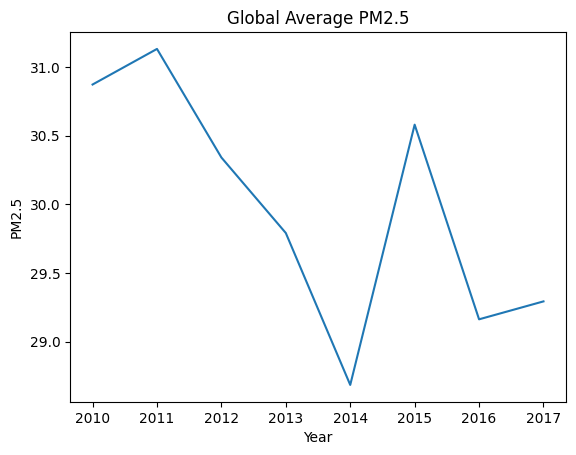

In [58]:
# Select columns to aggregate
pm_cols = pm_pol.columns[2:] 

# Take mean of selected columns
global_means = pm_pol[pm_cols].mean()

# Reset index 
global_means = global_means.reset_index()

# Rename columns
global_means.columns = ['Year', 'PM2.5']

# Create line chart
chart = sns.lineplot(data=global_means, x='Year', y="PM2.5")

# Add labels
chart.set_title('Global Average PM2.5')
chart.set(xlabel='Year', ylabel='PM2.5') 

plt.show()

### Which countries have seen the biggest increases or decreases in PM2.5 pollution from 2010 to 2017?

In [60]:
# Calculate absolute change from 2010 to 2017
pm_pol['Delta'] = abs(pm_pol['2010'] - pm_pol['2017'])

# Sort by absolute change 
pm_pol_sorted = pm_pol.sort_values('Delta', ascending=False)

# Get top 10 increases 
print(pm_pol_sorted.iloc[0:10][['Country Name', '2010', '2017', 'Delta']])

# Get top 10 decreases
print(pm_pol_sorted.iloc[-10:][['Country Name', '2010', '2017', 'Delta']])




# sns.displot(kind="hist", data=plants, x="Plant_height", hue="PH", col="PH")





                                    Country Name       2010       2017  \
156                                        Niger  69.150177  94.053818   
125                                    Sri Lanka  31.033781  11.099617   
157                                      Nigeria  52.609064  71.798174   
36                                         China  69.479570  52.664596   
38                                      Cameroon  59.293403  72.793096   
207   East Asia & Pacific (IDA & IBRD countries)  56.054831  42.671405   
55   East Asia & Pacific (excluding high income)  55.844976  42.539468   
57                           East Asia & Pacific  51.912011  39.749958   
129                    Late-demographic dividend  52.066881  40.000207   
225                          Upper middle income  49.417762  38.748285   

         Delta  
156  24.903641  
125  19.934164  
157  19.189110  
36   16.814975  
38   13.499693  
207  13.383426  
55   13.305508  
57   12.162054  
129  12.066674  
225  10.669476 